# Investigate a Dataset: No-show appointments

## 1. Introduction

Why do 30% of patients miss their scheduled appointments? A person makes a doctor's appointment, receives all the instructions, and no-show. Who to blame?
We will investigate the various characteristics of the patients and their appointments and try to come up with an idea about the most influential factors that make them miss their appointments.

## 2. Questions

* What are the characteristics of people that make the most appointments?
* Where is the neighborhood that holds the most appointments?
* What factors are important to predict if a patient will show up for their scheduled appointment?

## 3. Data Wrangling

### I. Gathering Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

SIZE = 16

plt.rc('font', size=SIZE)
plt.rc('axes', titlesize=SIZE)     
plt.rc('axes', labelsize=SIZE)    
plt.rc('xtick', labelsize=SIZE)   
plt.rc('ytick', labelsize=SIZE)   
plt.rc('legend', fontsize=SIZE)   
plt.rc('figure', titlesize=SIZE)

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### II. Assesing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.duplicated().sum()

0

According to the process of assessing data, we have no problems regarding missing or duplicated data but we have a data type problem regarding `ScheduledDay` and `AppointmentDay` columns which must be DateTime instead of object.

### III. Cleaning Data

In [5]:
# drop unimportant columns
df.drop(columns=['PatientId', 'AppointmentID'], inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# convert ScheduledDay and AppointmentDay to the correct data type
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


In [7]:
bins = [-1, 18, 40, 115]
labels = ['child', 'youth', 'old']
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels)

We made `age_category` column to facilitate getting insights about the age of the patients

In [8]:
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda timestamp: timestamp.replace(hour=0, minute=0, second=0))
df['schedule_to_appointment_duration'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

We extracted the feature of the duration between scheduling and appointment rounded up to the nearest day to get insights and to facilitate exploring the relation between it and the missing the scheduled appointment.

## 4. Exploratory Data Analysis(EDA)

In [9]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [10]:
def hist_plot(df, column, xlabel, ylabel, title):
    df[column].plot(kind='hist', bins=50)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

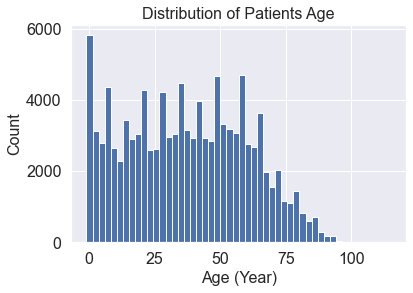

In [11]:
hist_plot(df, 'Age', 'Age (Year)', 'Count', 'Distribution of Patients Age')

In [12]:
def format_label(label):
    return column.replace('_', ' ').title()

def pie_plot(df, column):
    freq = df[column].value_counts()
    plt.figure(figsize=(10, 8))
    plt.pie(freq, labels=freq.index, autopct='%1.2f%%', shadow=True)
    plt.legend()
    plt.title('Propotions and Categories of {}'.format(format_label(column)))

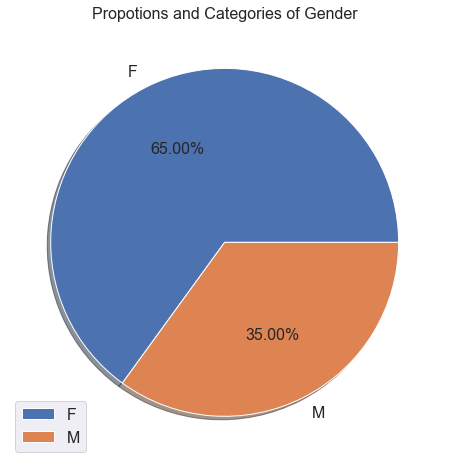

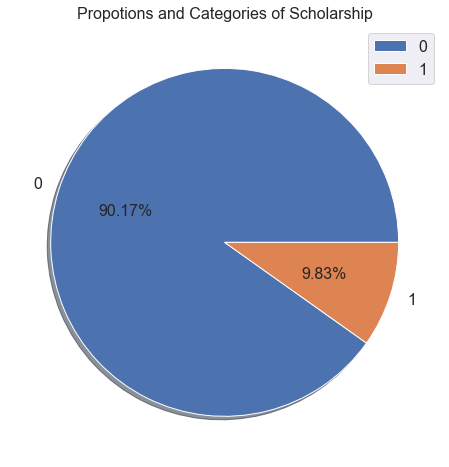

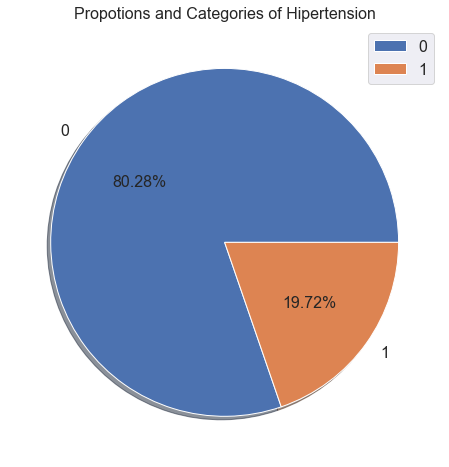

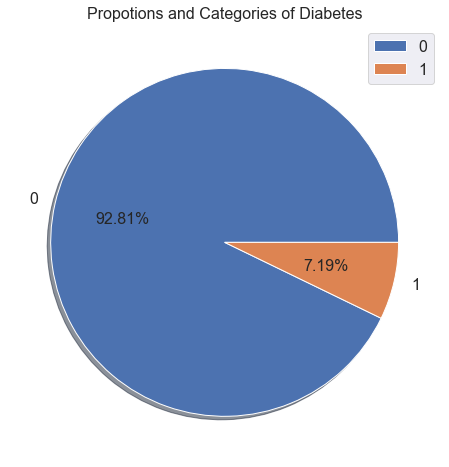

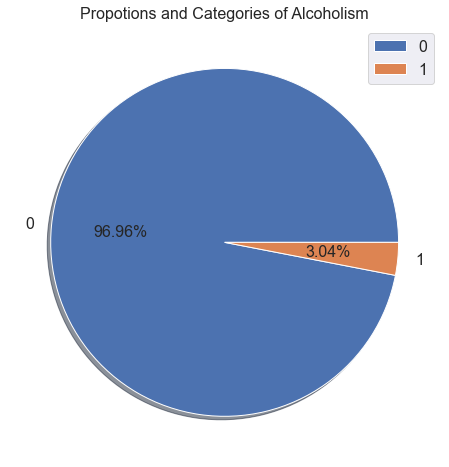

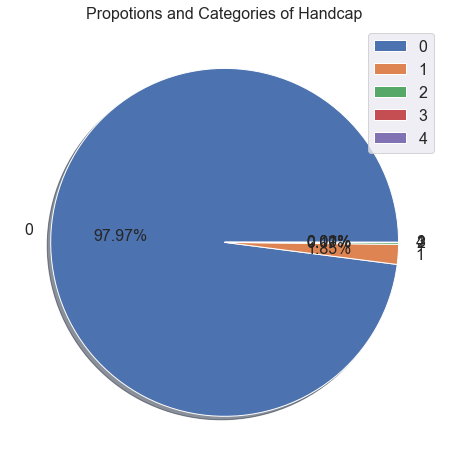

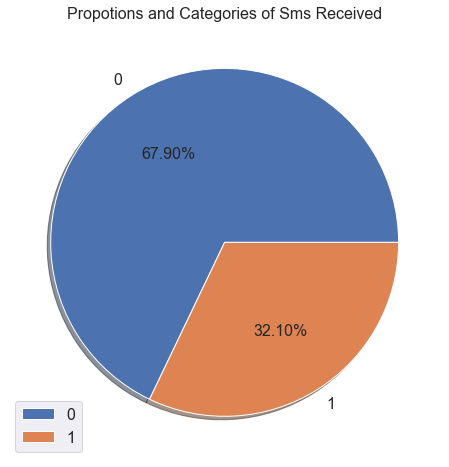

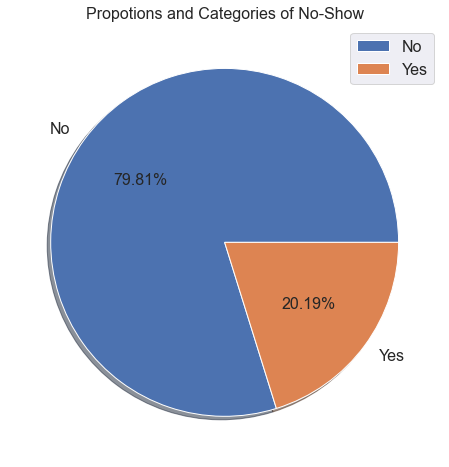

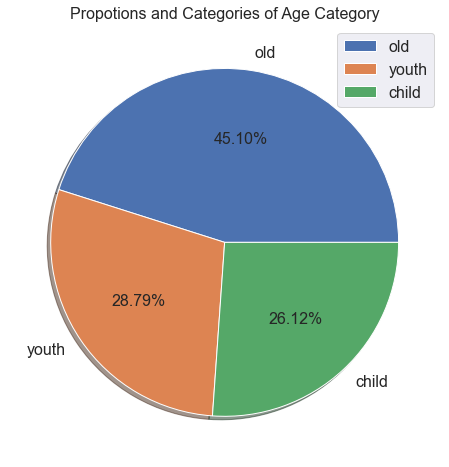

In [13]:
cateforical_features = ['Gender'] + list(df.columns[5:-1])
for column in cateforical_features:
    pie_plot(df, column)

There are some features are not represented well like Alcoholism and Handicap.

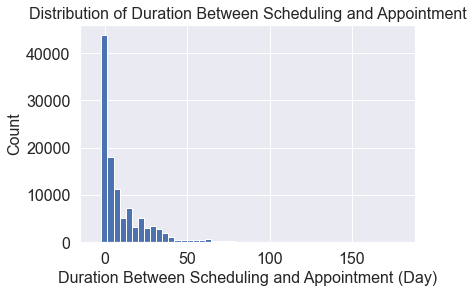

In [14]:
hist_plot(df, 'schedule_to_appointment_duration', 'Duration Between Scheduling and Appointment (Day)', 
          'Count', 'Distribution of Duration Between Scheduling and Appointment')

As we can see most people tend to reserve their appoinment a few days before.

## 5. Drawing Conclusions

### I. What are the characteristics of people that make the most appointments?

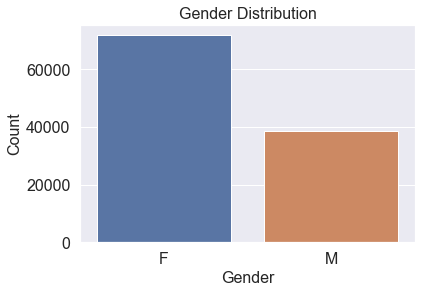

In [15]:
sns.countplot(data=df, x='Gender')
plt.ylabel('Count')
plt.title('Gender Distribution');

It's clear that women take more care of their health in comparison to man.

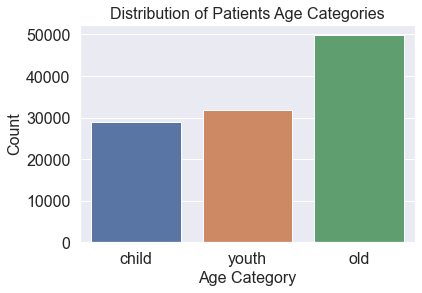

In [16]:
sns.countplot(data=df, x='age_category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Patients Age Categories');

We can see those old people make more appointments as opposed to children and youth. The reason is the old people need more health care or the old people category span many years from 40 to 115.

### II. Where is the neighborhood that holds the most appointments?

In [17]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

As we can see that `JARDIM CAMBURI` neighbourhood holds the most appointments.

### III. What factors are important to predict if a patient will show up for their scheduled appointment?

In [18]:
plt.rc('xtick', labelsize=16)   

def bar_plot(df, feature, target):
    count = df.groupby([feature, target]).count().iloc[:, -1].reset_index()
    count.rename(columns={count.columns[-1]: 'Proportion'}, inplace=True)
    feature_freq = df[feature].value_counts()
    
    # divide by each category to remove biasing resulting from the skewed distribution
    for category in feature_freq.index:
        count.loc[(count[feature] == category), 'Proportion'] = count[count[feature] == category]['Proportion'] / feature_freq[category]

    sns.barplot(data=count, x=target, hue=feature, y='Proportion')
    plt.title('Proportion by {} and {}'.format(format_label(feature), target))

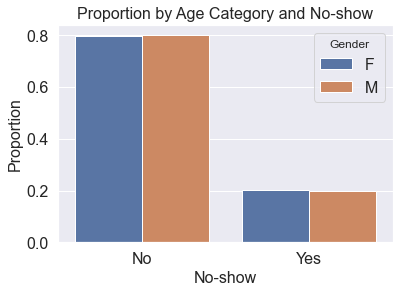

In [19]:
bar_plot(df, feature='Gender', target='No-show')

It's clear that gender isn't a factor that affects missing The appoinment as expected.

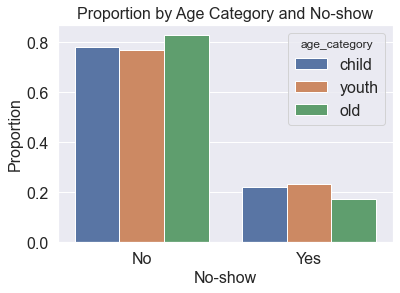

In [20]:
bar_plot(df, feature='age_category', target='No-show')

As we can see the youth are more likely to miss their appointment. After them comes children and lastly comes old people.

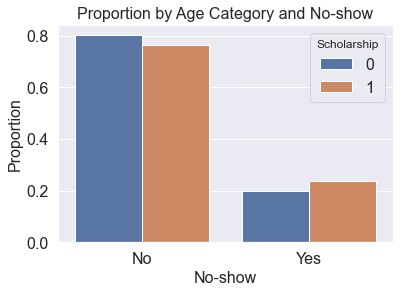

In [21]:
bar_plot(df, feature='Scholarship', target='No-show')

Patients who have scholarships tend to miss their appointments.

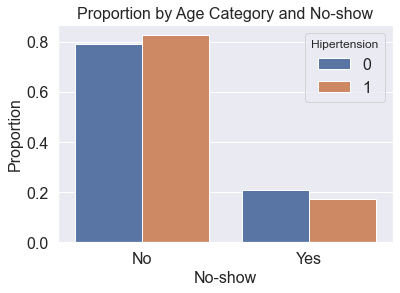

In [22]:
bar_plot(df, feature='Hipertension', target='No-show')

Patients who suffer from Hypertension are less likely to miss their appointments.

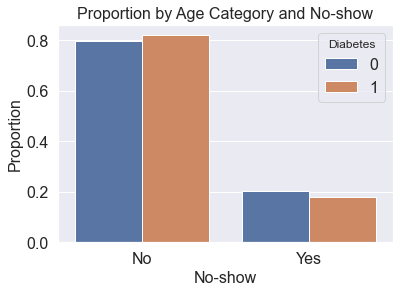

In [23]:
bar_plot(df, feature='Diabetes', target='No-show')

Patients who suffer from Diabetes are less likely to miss their appointments.

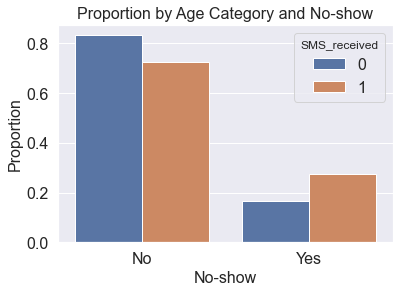

In [24]:
bar_plot(df, feature='SMS_received', target='No-show')

Patients who received SMS messages are much more likely to miss the appointments

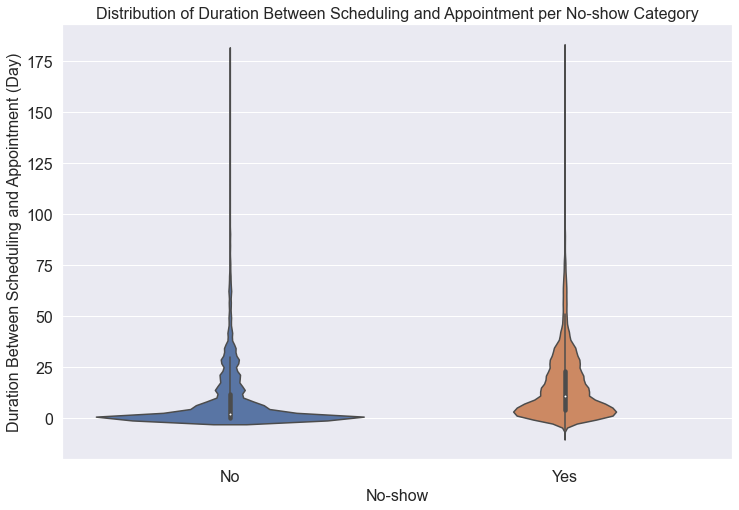

In [25]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='No-show', y='schedule_to_appointment_duration')
plt.ylabel('Duration Between Scheduling and Appointment (Day)')
plt.title('Distribution of Duration Between Scheduling and Appointment per No-show Category');

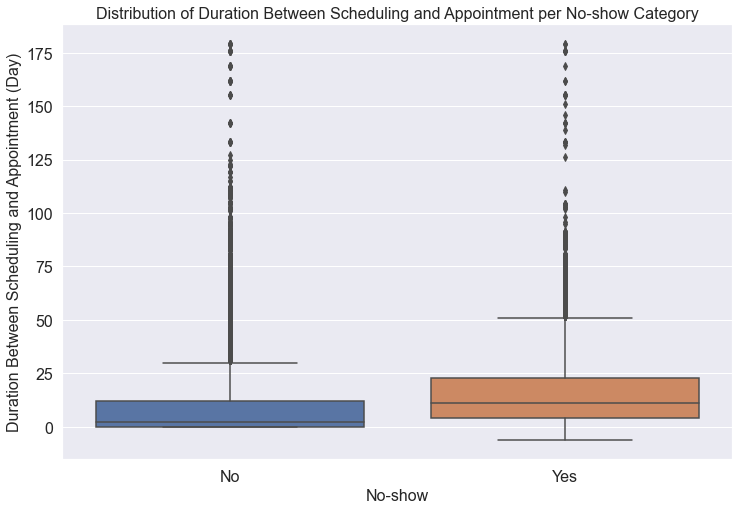

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='No-show', y='schedule_to_appointment_duration')
plt.ylabel('Duration Between Scheduling and Appointment (Day)')
plt.title('Distribution of Duration Between Scheduling and Appointment per No-show Category');

From the two previous diagrams, we can conclude that patients who register a few days before their appointments are much more likely to attend the appointments.

We won't explore the relation between people who have Alcoholism or Handcap as they represent a small portion of the dataset. Also we won't explore the factor of neighbourhood of the appoinment as id have many unique values with mush skewed distribution.

## Conclusion

* Women and old people tend to take more care about their health so they reserve more appointments.
* `JARDIM CAMBURI` neighbourhood holds the most appointments.
* The most important factors that makes the patient attend his/her appointments are:
    * Patient's age
    * Ownership of sponsorship
    * Suffering from hypertension
    * Suffering from diabetes
    * Recieving one or more SMS
    * Duration Between Scheduling and Appointment

## 6. Limitations

### I. Over the whole analysis process, we assumed that the data is sampled with little-to-no bias.
### II. Some Features are not represented appropiately like `Alcoholism` and `Handcap`